In [5]:
import collections

import numpy as np
import tensorflow as tf
import tensorflow_federated as tff
from tensorflow import keras

tf.compat.v1.enable_v2_behavior()

np.random.seed(0)

tff.federated_computation(lambda: 'Hello, World!')()

b'Hello, World!'

In [7]:
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [10]:
print(type(train_images))
print((train_images).shape)


<class 'numpy.ndarray'>
(60000, 28, 28)


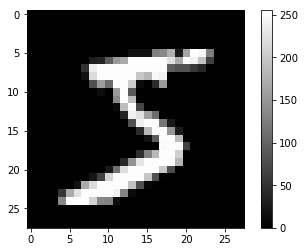

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(train_images[0], cmap='gray', aspect='equal')
plt.colorbar()
plt.grid(False)
plt.show()

In [2]:
def create_keras_model():
    return tf.keras.models.Sequential([
        tf.keras.layers.Input(shape = (28,28,1)),
        tf.keras.layers.Conv2D(filters = 32, kernel_size = (5,5), activation = 'relu'),
        tf.keras.layers.MaxPool2D(),
        tf.keras.layers.Conv2D(filters = 64, kernel_size = (5,5), activation = 'relu'),
        tf.keras.layers.MaxPool2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation = 'relu'),
        tf.keras.layers.Dense(10),
        tf.keras.layers.Softmax(),
    ])

In [ ]:
emnist_train, emnist_test = tf.keras.datasets.mnist.load_data()


NUM_EXAMPLES_PER_USER = 600
B = 10
BATCH_SIZE = NUM_EXAMPLES_PER_USER//B
EPOCHS = 20
NUMBER_OF_CLIENTS = 10

from tqdm import tqdm

def get_data_for_digit(source, digit):
    output_sequence = []
    all_samples = [i for i, d in enumerate(source[1]) if d == digit]
    for i in tqdm(range(0, min(len(all_samples), NUM_EXAMPLES_PER_USER), BATCH_SIZE)):
        batch_samples = all_samples[i:i + BATCH_SIZE]
        output_sequence.append({
            'x':
                np.array([tf.reshape(source[0][i]/255.0,[28,28,1]) for i in batch_samples],
                         dtype=np.float32),
            'y':
                np.array([tf.reshape(source[1][i], [1]) for i in batch_samples], dtype=np.int32)
        })
    return output_sequence


federated_train_data = [get_data_for_digit(emnist_train, d) for d in range(NUMBER_OF_CLIENTS)] * EPOCHS

federated_test_data = [get_data_for_digit(emnist_test, d) for d in range(NUMBER_OF_CLIENTS)]